# 02 - Exploratory Data Analysis & Initial Insights

## 1. Dataset Overview
## 2. Fraud vs Non-Fraud Distribution
## 3. Fraud Rate by Transaction Type
## 4. Amount vs Fraud
## 5. Time-based Fraud Patterns
## 6. Key EDA Takeaways

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('../data/processed/transactions_clean.parquet')

In [ ]:
#Fraud vs Non-Fraud 

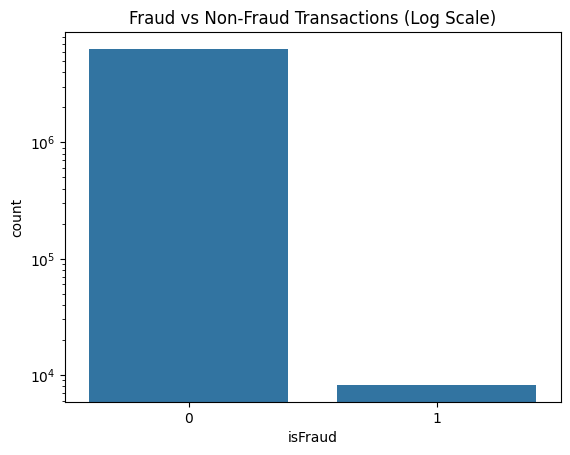

In [5]:
sns.countplot(x='isFraud', data=df)
plt.yscale('log')
plt.title("Fraud vs Non-Fraud Transactions (Log Scale)")
plt.show()

Even on a logarithmic scale, fraud transactions are significantly fewer than non-fraud ones. Fraud transactions represent only a very small fraction of all transactions, indicating a highly imbalanced dataset.

In [ ]:
#Fraud rate by transaction type

In [7]:
fraud_rate_by_type = (
    df.groupby('type')['isFraud']
    .mean()
    .sort_values(ascending=False)
)

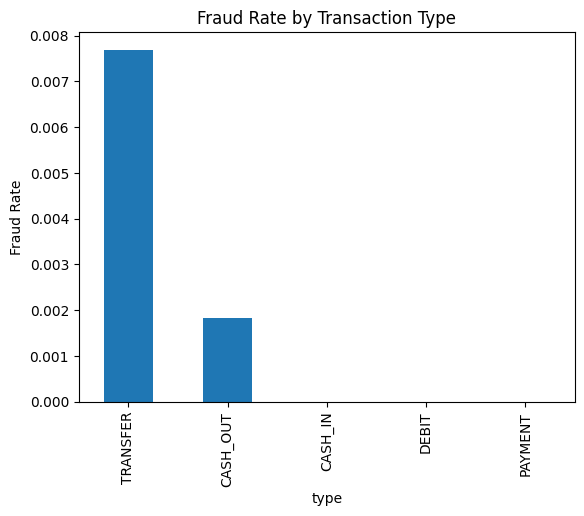

In [8]:
fraud_rate_by_type.plot(kind='bar')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

Fraud is highly concentrated in TRANSFER and CASH_OUT transactions, while other transaction types show near-zero fraud rates.

In [ ]:
#Amount vs Fraud

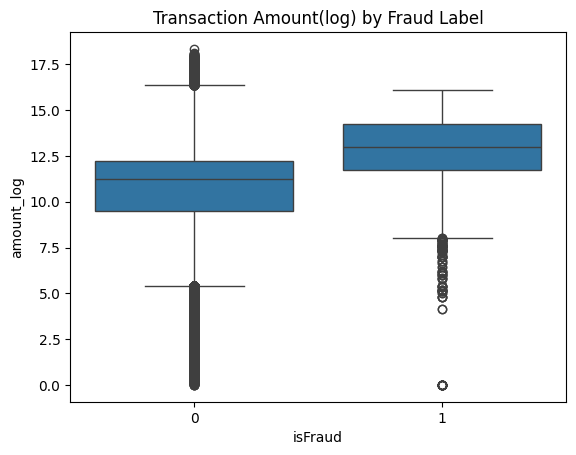

In [10]:
sns.boxplot(x='isFraud',y='amount_log',data=df)
plt.title('Transaction Amount(log) by Fraud Label')
plt.show()

Fraudulent transactions generally involve higher transaction amounts, with a noticeably higher median and interquartile range compared to non-fraud transactions. This suggests that transaction amount is a strong signal for fraud detection.

In [ ]:
#Time-based fraud pattern

In [13]:
fraud_by_day = df.groupby('day')['isFraud'].mean()

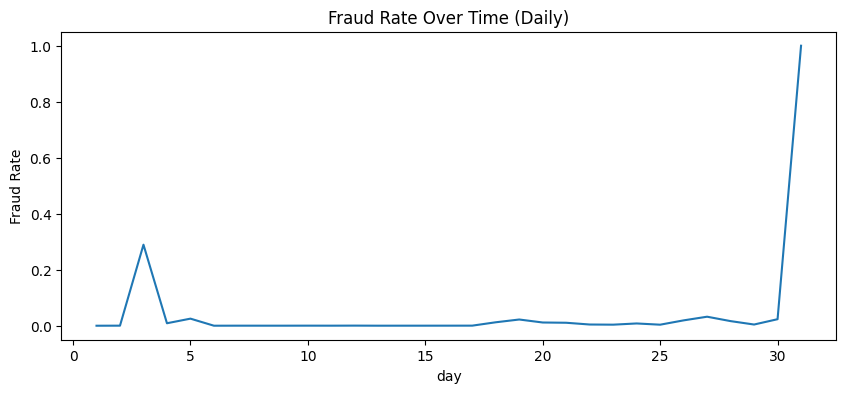

In [14]:
fraud_by_day.plot(figsize=(10,4))
plt.title('Fraud Rate Over Time (Daily)')
plt.ylabel('Fraud Rate')
plt.show()

When transactions are aggregated daily, fraud rates appear mostly stable with occasional spikes. These spikes are likely influenced by low transaction counts on certain days rather than sustained increases in fraudulent activity.


## Key EDA Takeaways

1. The dataset is extremely imbalanced, with fraud transactions accounting for a very small percentage.
2. Fraud is concentrated in specific transaction types, mainly TRANSFER and CASH_OUT.
3. Fraudulent transactions generally involve higher amounts than non-fraud transactions.
4. Daily aggregation reveals that fraud occurs sporadically rather than following a consistent temporal trend. Extreme daily spikes are largely driven by low transaction volumes and should be interpreted cautiously.